In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline  

In [4]:
def find_routes_with_ten_readings(df, route_numbers, min_num_readings=10, verbose=False):
    routes = []
    
    for number in route_numbers:
        route_df = df[df['route_number'] == number]
        
        if len(route_df) >= min_num_readings:
            routes.append(route_df)
        elif verbose:
            print('Route: ', number, ' only has ', len(route_df), ' readings!')
    
    print('Found', len(routes), 'routes that have', min_num_readings, 'or more readings')
    
    return pd.concat(routes)


def load_csv_as_df(file_name, sub_directories, column_numbers=None, column_names=None):
    '''
    Load any csv as a pandas dataframe. Provide the filename, the subdirectories, and columns to read(if desired).
    '''
    base_path = os.getcwd()
    full_path = base_path + sub_directories + file_name

    if column_numbers is not None:
        df = pd.read_csv(full_path, usecols=column_numbers)
    else:
        df = pd.read_csv(full_path)

    if column_names is not None:
        df.columns = column_names
    
    route_ids = df['route_number'].unique()
    return find_routes_with_ten_readings(df, route_ids, min_num_readings=10)


def load_google_map_dfs():
    column_names = ['latitude', 'longitude']
    file_names = ['BottomRoute.csv', 'MiddleRoute.csv', 'TopRoute.csv', 'TrainToAirMiddle.csv']
    base_path = os.getcwd()

    bottom_df = pd.read_csv(base_path + '/' + file_names[0])
    bottom_df.columns = column_names

    middle_df = pd.read_csv(base_path + '/' + file_names[1])
    middle_df.columns = column_names
    
    middle_df2 = pd.read_csv(base_path + '/' + file_names[3])
    middle_df2.columns = column_names

    top_df = pd.read_csv(base_path + '/' + file_names[2])
    top_df.columns = column_names
    
    return bottom_df, middle_df, middle_df2, top_df

In [5]:
train_df = load_csv_as_df('all-train-to-air-routes-with-cells.csv', '/')
air_df = load_csv_as_df('all-air-to-train-routes-with-cells.csv', '/')

Found 17 routes that have 10 or more readings
Found 21 routes that have 10 or more readings


In [6]:
bottom_df, middle_air_train_df, middle__train_air_df, top_df = load_google_map_dfs()

In [25]:
def graph_google_map_routes(dfs, title, one_color=False, return_plot=False):
    """
    Graphs all routes in list of data frames where each df is one route
    :param dfs: list of dataframes
    :param title: String title for plot
    :param one_color: bool use the same color for all lines
    :return: plot
    """
    color_count = 1
    colour_codes = map('C{}'.format, cycle(range(50)))

    for df in dfs:
        long = df['longitude'].tolist()
        lat = df['latitude'].tolist()
        colour_code = next(colour_codes)
        
        if one_color:
            plt.plot(long, lat, color='g')
        else:
            plt.plot(long, lat, color=colour_code)
            color_count += 1

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    
    if return_plot:
        return plt
    else:
        plt.savefig(title + '.png')
        plt.show()


def add_routes_to_plot(plot, df):
    route_numbers = df['route_number'].unique()

    for route_number in route_numbers:
        route_data = df[df['route_number'] == route_number]

        long = route_data['longitude'].tolist()
        lat = route_data['latitude'].tolist()

        plot.plot(long, lat, color='r')

    return plot


def plot_actual_routes_with_google_maps_routes(google_map_dfs, title, route_df):
    plot = graph_google_map_routes(google_map_dfs, title, one_color=True, return_plot=True)

    plot = add_routes_to_plot(plot, route_df)

    plot.savefig(title + '.png')
    plot.show()

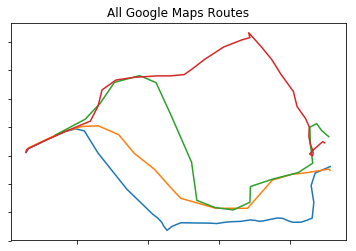

In [17]:
# Graphs all routes from Google Maps
graph_google_map_routes([bottom_df, middle_air_train_df, middle__train_air_df, top_df], 'All Google Maps Routes')

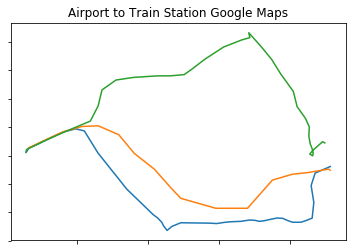

In [18]:
# Graphs Airport to Train from Google Maps
graph_google_map_routes([bottom_df, middle_air_train_df, top_df], 'Airport to Train Station Google Maps')

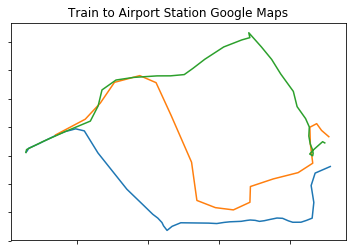

In [20]:
# Graph Train to Airport from Google Maps
graph_google_map_routes([bottom_df, middle__train_air_df, top_df], 'Train to Airport Station Google Maps')

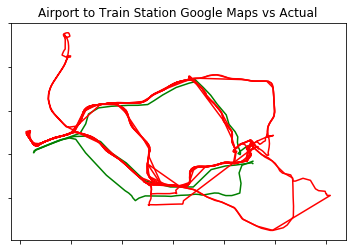

In [24]:
# Air to train
plot_actual_routes_with_google_maps_routes([bottom_df, middle_air_train_df, top_df], 'Airport to Train Station Google Maps vs Actual', air_df)

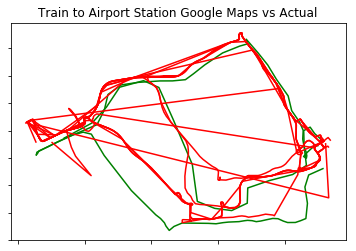

In [27]:
plot_actual_routes_with_google_maps_routes([bottom_df, middle__train_air_df, top_df], 'Train to Airport Station Google Maps vs Actual', train_df)

In [28]:
def plot_suspected_fraud_vs_google_maps(google_map_dfs, route_number, df, title):
    plot = graph_google_map_routes(google_map_dfs, title, one_color=True, return_plot=True)

    route_df = df[df['route_number'] == route_number]

    plot = add_routes_to_plot(plot, route_df)
    plot.savefig(title + '.png')
    plot.show()

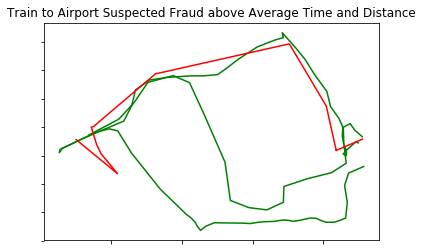

In [29]:
plot_title = 'Train to Airport Suspected Fraud above Average Time and Distance'
plot_suspected_fraud_vs_google_maps([bottom_df, middle__train_air_df, top_df], 172162, train_df, plot_title)